In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [93]:
#Read CSV
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

#city_data

#ride_data

#Merge City and Ride Data together on City
ridesharedf = pd.merge(city_data, ride_data, on="city")
ridesharedf.head()

city  driver_count   type             date   fare       ride_id
0  Kelseyland            63  Urban   8/19/2016 4:27   5.51  6.246010e+12
1  Kelseyland            63  Urban   4/17/2016 6:59   5.54  7.466470e+12
2  Kelseyland            63  Urban   5/4/2016 15:06  30.54  2.140500e+12
3  Kelseyland            63  Urban  1/25/2016 20:44  12.08  1.896990e+12
4  Kelseyland            63  Urban   8/9/2016 18:19  17.91  8.784210e+12

In [94]:
#Bubble Plot
#Seperate Data Frames for Bubble Plot
urban = ridesharedf.loc[(ridesharedf["type"]=="Urban")]
rural = ridesharedf.loc[(ridesharedf["type"]=="Rural")]
sub = ridesharedf.loc[(ridesharedf["type"]=="Suburban")]

#Average Fair Calculation per area
avg_urban = urban.groupby(['city'])['fare'].mean()
#avg_urban - checked to see if data populated
avg_rural = rural.groupby(['city'])['fare'].mean()
avg_sub = sub.groupby(['city'])['fare'].mean()

#Total Ride Calculation per area
tride_urban = urban.groupby(['city']).count()['ride_id']
#tride_urban
tride_rural = rural.groupby(['city']).count()['ride_id']
tride_sub = sub.groupby(['city']).count()['ride_id']

#Total drivers per area
tdrivers_urban = urban.groupby(['city'])['driver_count'].value_counts()
#tdrivers_urban
tdrivers_rural = rural.groupby(['city'])['driver_count'].value_counts()
tdrivers_sub = sub.groupby(['city'])['driver_count'].value_counts()

In [95]:
#test to check data for 1 of 3 data frames
#urban_df = pd.DataFrame({"Average Fare" : avg_urban, "Total Rides":tride_urban, "Total Drivers":tdrivers_urban})
#urban_df["Average Fare"] = urban_df["Average Fare"].map("{:,}".format)
#urban_df["Total Rides"] =urban_df["Total Rides"].map("{:,}".format)
#urban_df["Total Drivers"] =urban_df["Total Drivers"].map("{:,}".format)
#urban_df = urban_df.loc[:,["Average Fare", "Total Rides", "Total Drivers"]]
#urban_df.sort_values("Average Fare", ascending =False).head()

#received type error - expecting tuplet received string..tried .format but still received the same error

In [96]:
#Creating Scatter Plot
#Urban
plt.scatter(tride_urban,avg_urban,tdrivers_urban, marker ='+', facecolors= "purple", alpha = .44, label = "Urban")
#Rural
plt.scatter(tride_rural,avg_rural,tdrivers_rural, marker ='o', facecolors = "yellow", alpha = .5, label = "Rural")
#Suburbs
plt.scatter(tride_sub,avg_sub,tdrivers_sub, marker ='*', facecolors = "red", alpha = .54, label = "Suburbs")

In [97]:

#chart labels
plt.title("PyUber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend(loc= 'lower right')


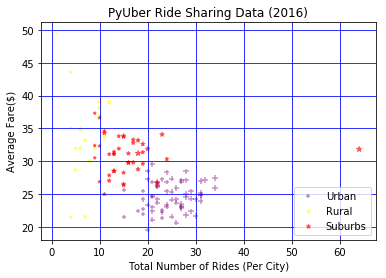

In [98]:
plt.grid(b=True, which='major', color='blue', linestyle='-')
plt.savefig("Pyber Scat Plt")
plt.show()

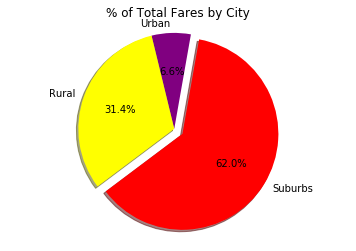

In [99]:
#Total Fares by Area Type
Total_Fare = ridesharedf.groupby(['type'])['fare'].sum()
labels = ["Urban", "Rural", "Suburbs"]
colors = ["purple", "yellow", "red"]
explode = (0,0,.1)

plt.title("% of Total Fares by City")
plt.pie(Total_Fare, explode=explode, labels=labels, colors=colors, autopct ="%1.1f%%", shadow = True, startangle=80)
plt.axis("equal")
plt.show()

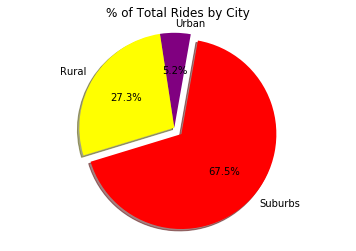

In [100]:
#Total Rides Per City
Total_Rides = ridesharedf.groupby(['type']).count()['ride_id']
labels = ["Urban", "Rural", "Suburbs"]
colors = ["purple", "yellow", "red"]
explode = (0,0,.1)

plt.title("% of Total Rides by City")
plt.pie(Total_Rides, explode=explode, labels=labels, colors=colors, autopct ="%1.1f%%", shadow = True, startangle=80)
plt.axis("equal")
plt.show()

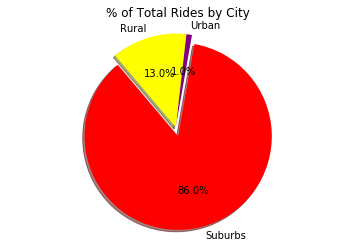

In [101]:
#Total Drivers by Area
#Total Rides Per City
Total_Drivers = ridesharedf.groupby(['type']).agg({'driver_count':['sum']})
labels = ["Urban", "Rural", "Suburbs"]
colors = ["purple", "yellow", "red"]
explode = (0,0,.1)

plt.title("% of Total Rides by City")
plt.pie(Total_Drivers, explode=explode, labels=labels, colors=colors, autopct ="%1.1f%%", shadow = True, startangle=80)
plt.axis("equal")
plt.show()